In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [29]:
# Load the image
image = cv2.imread(r'C:\Users\prajw\Documents\ResaluteAI.in\Task7 data-20240717T102920Z-001\Task7 data\3.jpeg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [30]:
# Apply GaussianBlur to reduce noise
blur = cv2.GaussianBlur(gray, (11,11), 0)

In [31]:
thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)



In [32]:
# Find edges using Canny
canny = cv2.Canny(thresh, 30, 150)

In [33]:
# Dilate the edges to close gaps
dilated = cv2.dilate(canny, (1,1), iterations = 2)

In [34]:
# Find contours
(contours, hierarchy) = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [35]:
# Draw contours on the original image
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb, contours, -1, (0,255,0), 2)

array([[[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [ 24,  25,  27],
        [ 25,  25,  25],
        [ 25,  25,  25]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [ 33,  34,  36],
        [ 33,  33,  33],
        [ 33,  33,  33]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [ 30,  31,  35],
        [ 30,  31,  33],
        [ 30,  31,  33]],

       ...,

       [[128, 159, 180],
        [129, 160, 181],
        [130, 161, 182],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[137, 168, 189],
        [136, 167, 188],
        [135, 166, 187],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[119, 150, 171],
        [121, 152, 173],
        [125, 156, 177],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]]

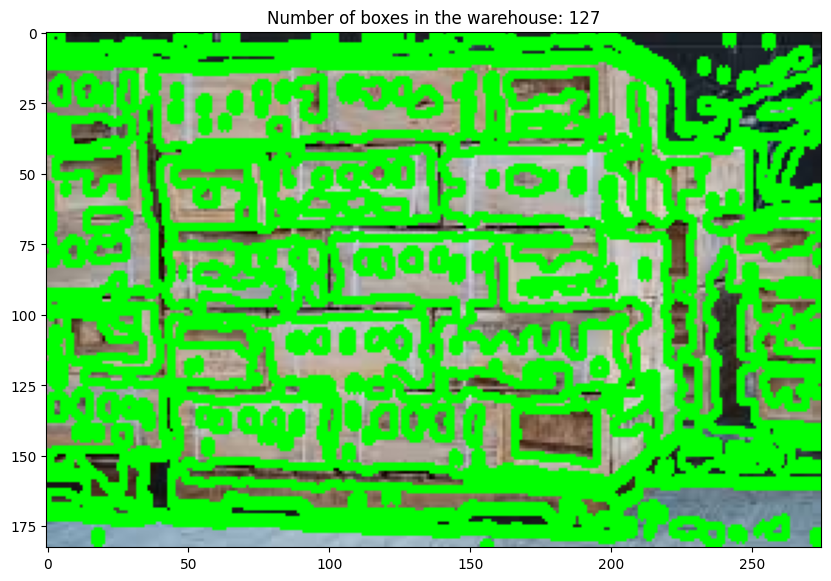

In [36]:
plt.figure(figsize=(10, 10))
plt.imshow(rgb)
plt.title(f'Number of boxes in the warehouse: {len(contours)}')
plt.show()


In [37]:
print('Number of boxes in the warehouse:', len(contours))

Number of boxes in the warehouse: 127


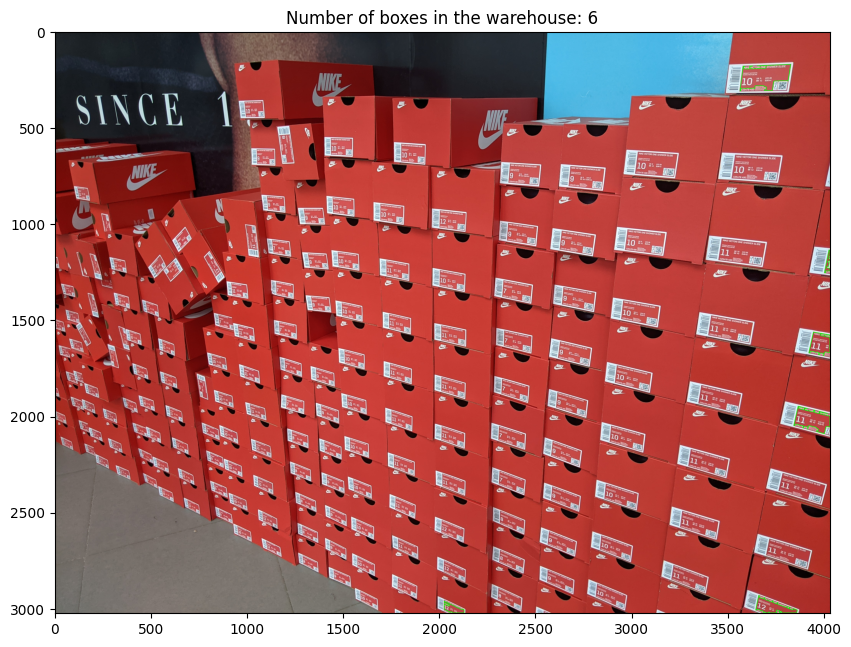

Number of boxes in the warehouse: 6


In [38]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread(r'C:\Users\prajw\Documents\ResaluteAI.in\Task7 data-20240717T102920Z-001\Task7 data\4.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply GaussianBlur to reduce noise
blur = cv2.GaussianBlur(gray, (11, 11), 0)

# Apply Otsu's thresholding
_, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Use morphological operations to close gaps
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

# Find contours
contours, _ = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter contours based on size to exclude noise
filtered_contours = []
for cnt in contours:
    area = cv2.contourArea(cnt)
    if 500 < area < 50000:  # Adjust these values based on your image
        filtered_contours.append(cnt)

# Draw contours on the original image
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb, filtered_contours, -1, (0, 255, 0), 2)

# Display the result
plt.figure(figsize=(10, 10))
plt.imshow(rgb)
plt.title(f'Number of boxes in the warehouse: {len(filtered_contours)}')
plt.show()

print('Number of boxes in the warehouse:', len(filtered_contours))
